In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from itertools import product
import itertools
from scipy import stats
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm

data = pd.read_csv(r"C:\Users\Superuser\Desktop\Datasets\sample_submission.csv")

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3500 non-null   int64  
 1   target  3500 non-null   float64
 2   O2_1    3500 non-null   float64
 3   O2_2    3500 non-null   float64
 4   O2_3    3500 non-null   float64
 5   O2_4    3500 non-null   float64
 6   O2_5    3500 non-null   float64
 7   O2_6    3500 non-null   float64
 8   O2_7    3500 non-null   float64
 9   NH4_1   3500 non-null   float64
 10  NH4_2   3500 non-null   float64
 11  NH4_3   3500 non-null   float64
 12  NH4_4   3500 non-null   float64
 13  NH4_5   3500 non-null   float64
 14  NH4_6   3500 non-null   float64
 15  NH4_7   3500 non-null   float64
 16  NO2_1   3500 non-null   float64
 17  NO2_2   3500 non-null   float64
 18  NO2_3   3500 non-null   float64
 19  NO2_4   3500 non-null   float64
 20  NO2_5   3500 non-null   float64
 21  NO2_6   3500 non-null   float64
 22  

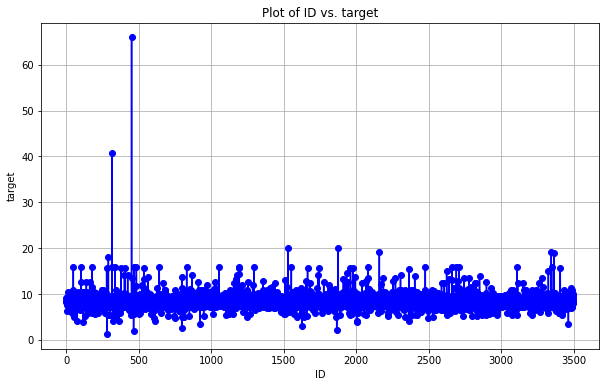

In [71]:
plt.figure(figsize=(10, 6)) 
plt.plot(data['id'], data['target'], marker='o', linestyle='-', color='blue')
plt.xlabel('ID')
plt.ylabel('target')
plt.title('Plot of ID vs. target')
plt.grid(True)
plt.show()


In [72]:
data[data['target'] > 30] 

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
316,316,40.78,40.90,40.90,9.500,6.805,5.01,8.76,6.805,0.49,...,9.805,4.53,4.42,4.8,3.500,4.650,6.025,5.070,3.850,4.14
451,451,65.93,40.95,65.95,9.265,6.625,5.01,8.37,6.375,0.71,...,7.795,1.73,1.78,4.1,4.645,4.725,5.725,10.645,3.025,3.80


Dropping outliers 

In [73]:
drops = [316 , 451]

data = data.drop(drops).reset_index(drop=True)

## Feature Selection

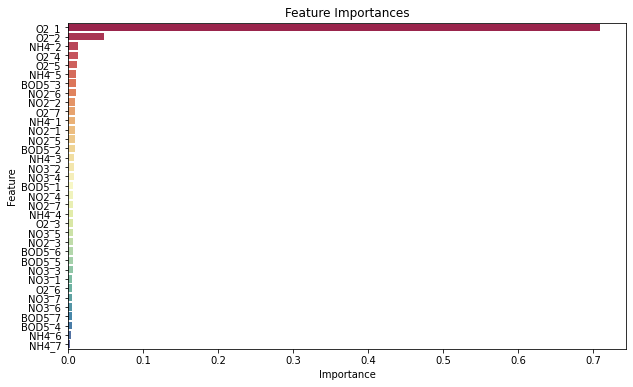

Top 3 Features by Importance:
  Feature  Importance
0    O2_1    0.708195
1    O2_2    0.047303
8   NH4_2    0.013306


In [6]:
X = data.drop(['target', 'id'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=1000, max_depth=7, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_features = importance_df['Feature'].head(3).tolist()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Spectral")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

print("Top 3 Features by Importance:")
print(importance_df.head(3))  

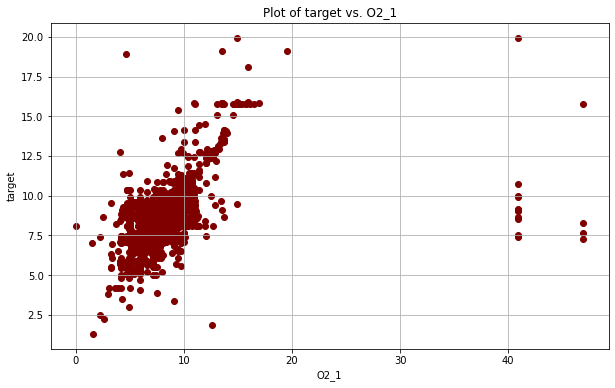

In [74]:
plt.figure(figsize=(10, 6)) 
plt.scatter(data['O2_1'], data['target'], marker='o', linestyle='-', color='maroon')
plt.xlabel('O2_1')
plt.ylabel('target')
plt.title('Plot of target vs. O2_1')
plt.grid(True)
plt.show()


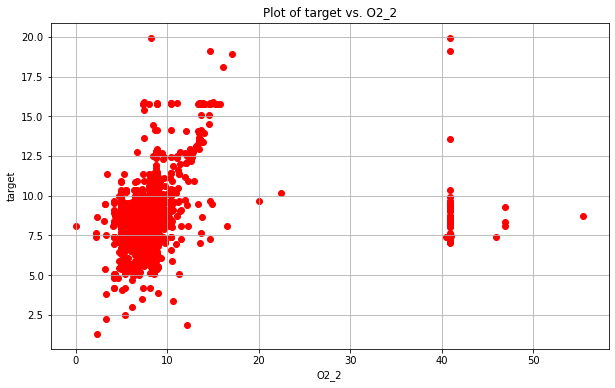

In [75]:
plt.figure(figsize=(10, 6)) 
plt.scatter(data['O2_2'], data['target'], marker='o', linestyle='-', color='red')
plt.xlabel('O2_2')
plt.ylabel('target')
plt.title('Plot of target vs. O2_2')
plt.grid(True)
plt.show()


# Baseline CV score

In [77]:
X = data.drop('target', axis=1)
y = data['target']


k_values = [5, 10]  

for k in k_values:
    print(f"Experimenting with k = {k}")
    
    
    rmse_scores = []

    
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        
        model = RandomForestRegressor(n_estimators=1000, max_depth=7, n_jobs=-1, random_state=42)
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    
    mean_rmse = np.mean(rmse_scores)
    print(f"Mean RMSE across {k}-fold cross-validation: {mean_rmse:.5f}")
    print("=" * 50)  

    



Experimenting with k = 5
Mean RMSE across 5-fold cross-validation: 1.07518
Experimenting with k = 10
Mean RMSE across 10-fold cross-validation: 1.06606


# Baseline R^2

In [78]:
y_pred = model.predict(X_test)  
y_true = y_test  
explained_var_score = explained_variance_score(y_true, y_pred)
print(f"Explained Variance Score: {explained_var_score:.5f}")


Explained Variance Score: 0.56331


In [79]:
data[['O2_1']].describe(), data[['O2_2']].describe()

(              O2_1
 count  3498.000000
 mean      8.198292
 std       2.939253
 min       0.000000
 25%       7.100000
 50%       7.880000
 75%       9.100000
 max      46.950000,
               O2_2
 count  3498.000000
 mean      9.266347
 std       6.730896
 min       0.000000
 25%       7.300000
 50%       8.300000
 75%       8.700000
 max      55.450000)

#### Too High standard deviation 

# Normality check

We will be using an RLM model that assumes data is normally distributed

Shapiro-Wilk test for "target" column:
Stat: 0.8519030213356018
P-value: 0.0

Shapiro-Wilk test for "O2_1" column:
Stat: 0.5159890651702881
P-value: 0.0


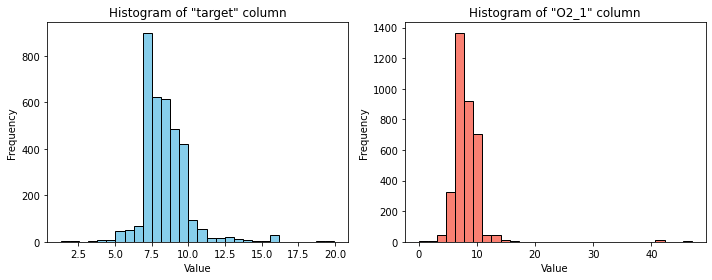

In [80]:
target_data = data['target']


shapiro_stat_target, shapiro_p_target = stats.shapiro(target_data)
print(f'Shapiro-Wilk test for "target" column:\nStat: {shapiro_stat_target}\nP-value: {shapiro_p_target}')


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(target_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of "target" column')
plt.xlabel('Value')
plt.ylabel('Frequency')


o2_1_data = data['O2_1']


shapiro_stat_o2_1, shapiro_p_o2_1 = stats.shapiro(o2_1_data)
print(f'\nShapiro-Wilk test for "O2_1" column:\nStat: {shapiro_stat_o2_1}\nP-value: {shapiro_p_o2_1}')


plt.subplot(1, 2, 2)
plt.hist(o2_1_data, bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of "O2_1" column')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Normality looks good

# RLM Regression

Detecting and removing significant outliers from most significant feature O2_1

RMSE with outliers: 1.4545370595768936
RMSE without outliers: 0.12306903842426511


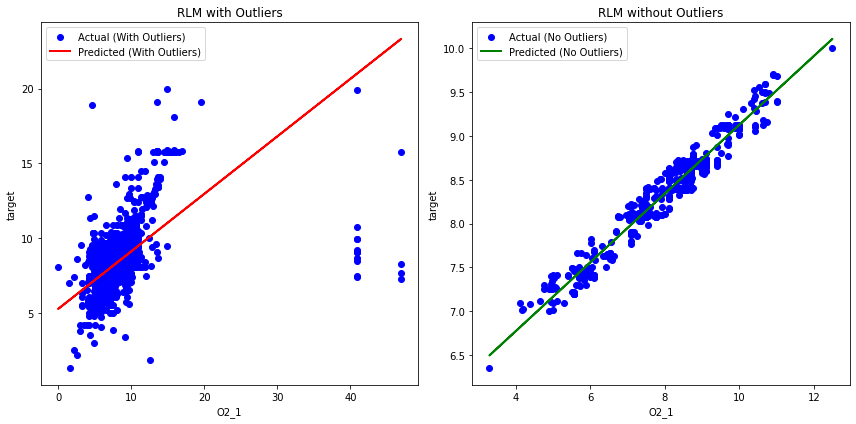

In [82]:
X = data[['O2_1']]
y = data['target']


X = sm.add_constant(X)


rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()


residuals = rlm_results.resid
outlier_threshold = .17 * np.std(residuals)  
outlier_indices = np.where(np.abs(residuals) > outlier_threshold)[0]
num_outliers = len(outlier_indices)


data_no_outliers = data.drop(index=outlier_indices).reset_index(drop=True)


X_no_outliers = data_no_outliers[['O2_1']]
y_no_outliers = data_no_outliers['target']


X_no_outliers = sm.add_constant(X_no_outliers)


rlm_model_no_outliers = sm.RLM(y_no_outliers, X_no_outliers, M=sm.robust.norms.HuberT())
rlm_results_no_outliers = rlm_model_no_outliers.fit()


rmse_with_outliers = np.sqrt(mean_squared_error(y, rlm_results.fittedvalues))
rmse_no_outliers = np.sqrt(mean_squared_error(y_no_outliers, rlm_results_no_outliers.fittedvalues))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X['O2_1'], y, color='blue', label='Actual (With Outliers)')
plt.plot(X['O2_1'], rlm_results.fittedvalues, color='red', linewidth=2, label='Predicted (With Outliers)')
plt.xlabel('O2_1')
plt.ylabel('target')
plt.title('RLM with Outliers')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_no_outliers['O2_1'], y_no_outliers, color='blue', label='Actual (No Outliers)')
plt.plot(X_no_outliers['O2_1'], rlm_results_no_outliers.fittedvalues, color='green', linewidth=2, label='Predicted (No Outliers)')
plt.xlabel('O2_1')
plt.ylabel('target')
plt.title('RLM without Outliers')
plt.legend()

plt.tight_layout()


print(f'RMSE with outliers: {rmse_with_outliers}')
print(f'RMSE without outliers: {rmse_no_outliers}')

plt.show()


### Keeping most significant feature and zeros elsewhere. 

 Kaggle competition requires all columns to be submitted

In [83]:
data_with_zeroes = data_no_outliers.copy()
data_with_zeroes.iloc[:, ~data_with_zeroes.columns.isin(['target', 'O2_1'])] = 0
data_with_zeroes

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.39,8.700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,8.12,7.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,8.12,7.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.60,9.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,8.09,7.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0,8.09,7.367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
647,0,8.42,8.700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
648,0,7.02,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
649,0,8.65,8.367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# K-Fold after outlier removal

In [85]:
X = data_with_zeroes.drop('target', axis=1)
y = data_with_zeroes['target']


k_values = [5]  

for k in k_values:
    print(f"Experimenting with k = {k}")
    
    
    rmse_scores = []

    
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        
        model = RandomForestRegressor(n_estimators=1000, max_depth=7, n_jobs=-1, random_state=42)
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    
    mean_rmse = np.mean(rmse_scores)
    print(f"Mean RMSE across {k}-fold cross-validation: {mean_rmse:.5f}")
    print("=" * 50)  

    



Experimenting with k = 5
Mean RMSE across 5-fold cross-validation: 0.11826


Significant improvement of about 89%

## R^2

In [86]:
y_pred = model.predict(X_test)  
y_true = y_test  
explained_var_score = explained_variance_score(y_true, y_pred)
print(f"Explained Variance Score: {explained_var_score:.5f}")


Explained Variance Score: 0.94885
